# The Gambler's Ruin Problem

## Introduction

The **Gambler's Ruin Problem** is a classic problem in probability theory that models a gambler who starts with an initial fortune and repeatedly makes fair or biased bets until they either go bankrupt (ruin) or reach a target wealth.

## Mathematical Formulation

### Problem Setup

Consider a gambler who:
- Starts with initial capital $i$ dollars
- Plays against an opponent (or casino) with capital $N - i$ dollars
- Total capital in the game is $N$ dollars
- Each round, wins with probability $p$ and loses with probability $q = 1 - p$
- Game ends when gambler has $0$ (ruin) or $N$ (wins all)

### Probability of Ruin

Let $P_i$ denote the probability of ruin (reaching state 0) starting from state $i$.

The boundary conditions are:
$$P_0 = 1 \quad \text{(already ruined)}$$
$$P_N = 0 \quad \text{(reached goal)}$$

For $0 < i < N$, the recurrence relation is:
$$P_i = p \cdot P_{i+1} + q \cdot P_{i-1}$$

### Closed-Form Solution

**Case 1: Fair game ($p = q = 0.5$)**
$$P_i = 1 - \frac{i}{N}$$

**Case 2: Biased game ($p \neq q$)**

Let $r = \frac{q}{p}$. Then:
$$P_i = \frac{r^i - r^N}{1 - r^N}$$

### Expected Duration

Let $D_i$ be the expected number of rounds until the game ends, starting from state $i$.

**Case 1: Fair game ($p = q = 0.5$)**
$$D_i = i(N - i)$$

**Case 2: Biased game ($p \neq q$)**
$$D_i = \frac{1}{q - p}\left(i - N \cdot \frac{1 - r^i}{1 - r^N}\right)$$

where $r = \frac{q}{p}$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import bernoulli

# Set random seed for reproducibility
np.random.seed(42)

## Analytical Solutions

First, let's implement the closed-form solutions for the probability of ruin and expected duration.

In [2]:
def probability_of_ruin(i, N, p):
    """
    Calculate the probability of ruin starting from state i.
    
    Parameters:
    -----------
    i : int
        Initial capital
    N : int
        Target capital (total in game)
    p : float
        Probability of winning each round
    
    Returns:
    --------
    float
        Probability of ruin
    """
    if i == 0:
        return 1.0
    if i == N:
        return 0.0
    
    q = 1 - p
    
    # Fair game case
    if abs(p - 0.5) < 1e-10:
        return 1 - i / N
    
    # Biased game case
    r = q / p
    return (r**i - r**N) / (1 - r**N)


def expected_duration(i, N, p):
    """
    Calculate the expected number of rounds until game ends.
    
    Parameters:
    -----------
    i : int
        Initial capital
    N : int
        Target capital
    p : float
        Probability of winning each round
    
    Returns:
    --------
    float
        Expected number of rounds
    """
    if i == 0 or i == N:
        return 0.0
    
    q = 1 - p
    
    # Fair game case
    if abs(p - 0.5) < 1e-10:
        return i * (N - i)
    
    # Biased game case
    r = q / p
    return (1 / (q - p)) * (i - N * (1 - r**i) / (1 - r**N))

## Monte Carlo Simulation

Now let's simulate the gambler's ruin problem to verify our analytical results.

In [3]:
def simulate_gamblers_ruin(i, N, p, n_simulations=10000):
    """
    Simulate the gambler's ruin problem.
    
    Parameters:
    -----------
    i : int
        Initial capital
    N : int
        Target capital
    p : float
        Probability of winning each round
    n_simulations : int
        Number of simulations to run
    
    Returns:
    --------
    tuple
        (ruin_probability, mean_duration, sample_paths)
    """
    ruins = 0
    durations = []
    sample_paths = []
    
    for sim in range(n_simulations):
        capital = i
        path = [capital]
        steps = 0
        
        while 0 < capital < N:
            # Win with probability p, lose with probability q
            if np.random.random() < p:
                capital += 1
            else:
                capital -= 1
            path.append(capital)
            steps += 1
        
        if capital == 0:
            ruins += 1
        
        durations.append(steps)
        
        # Store first 20 paths for visualization
        if sim < 20:
            sample_paths.append(path)
    
    ruin_probability = ruins / n_simulations
    mean_duration = np.mean(durations)
    
    return ruin_probability, mean_duration, sample_paths

## Numerical Experiments

### Experiment 1: Comparing Theory vs Simulation

Let's verify our analytical formulas against Monte Carlo simulations.

In [4]:
# Parameters
N = 20  # Total capital
p_values = [0.4, 0.5, 0.6]  # Different win probabilities
initial_capitals = range(1, N)

# Storage for results
results = {}

for p in p_values:
    analytical_ruin = []
    simulated_ruin = []
    analytical_duration = []
    simulated_duration = []
    
    for i in initial_capitals:
        # Analytical solutions
        analytical_ruin.append(probability_of_ruin(i, N, p))
        analytical_duration.append(expected_duration(i, N, p))
        
        # Simulations
        sim_ruin, sim_dur, _ = simulate_gamblers_ruin(i, N, p, n_simulations=5000)
        simulated_ruin.append(sim_ruin)
        simulated_duration.append(sim_dur)
    
    results[p] = {
        'analytical_ruin': analytical_ruin,
        'simulated_ruin': simulated_ruin,
        'analytical_duration': analytical_duration,
        'simulated_duration': simulated_duration
    }

print("Simulations complete!")

Simulations complete!


### Experiment 2: Sample Random Walk Paths

Let's visualize some sample paths of the gambler's fortune over time.

In [5]:
# Generate sample paths for visualization
i_start = 10
N_total = 20
p_fair = 0.5

_, _, sample_paths = simulate_gamblers_ruin(i_start, N_total, p_fair, n_simulations=100)

## Visualization

Now let's create comprehensive visualizations of the gambler's ruin problem.

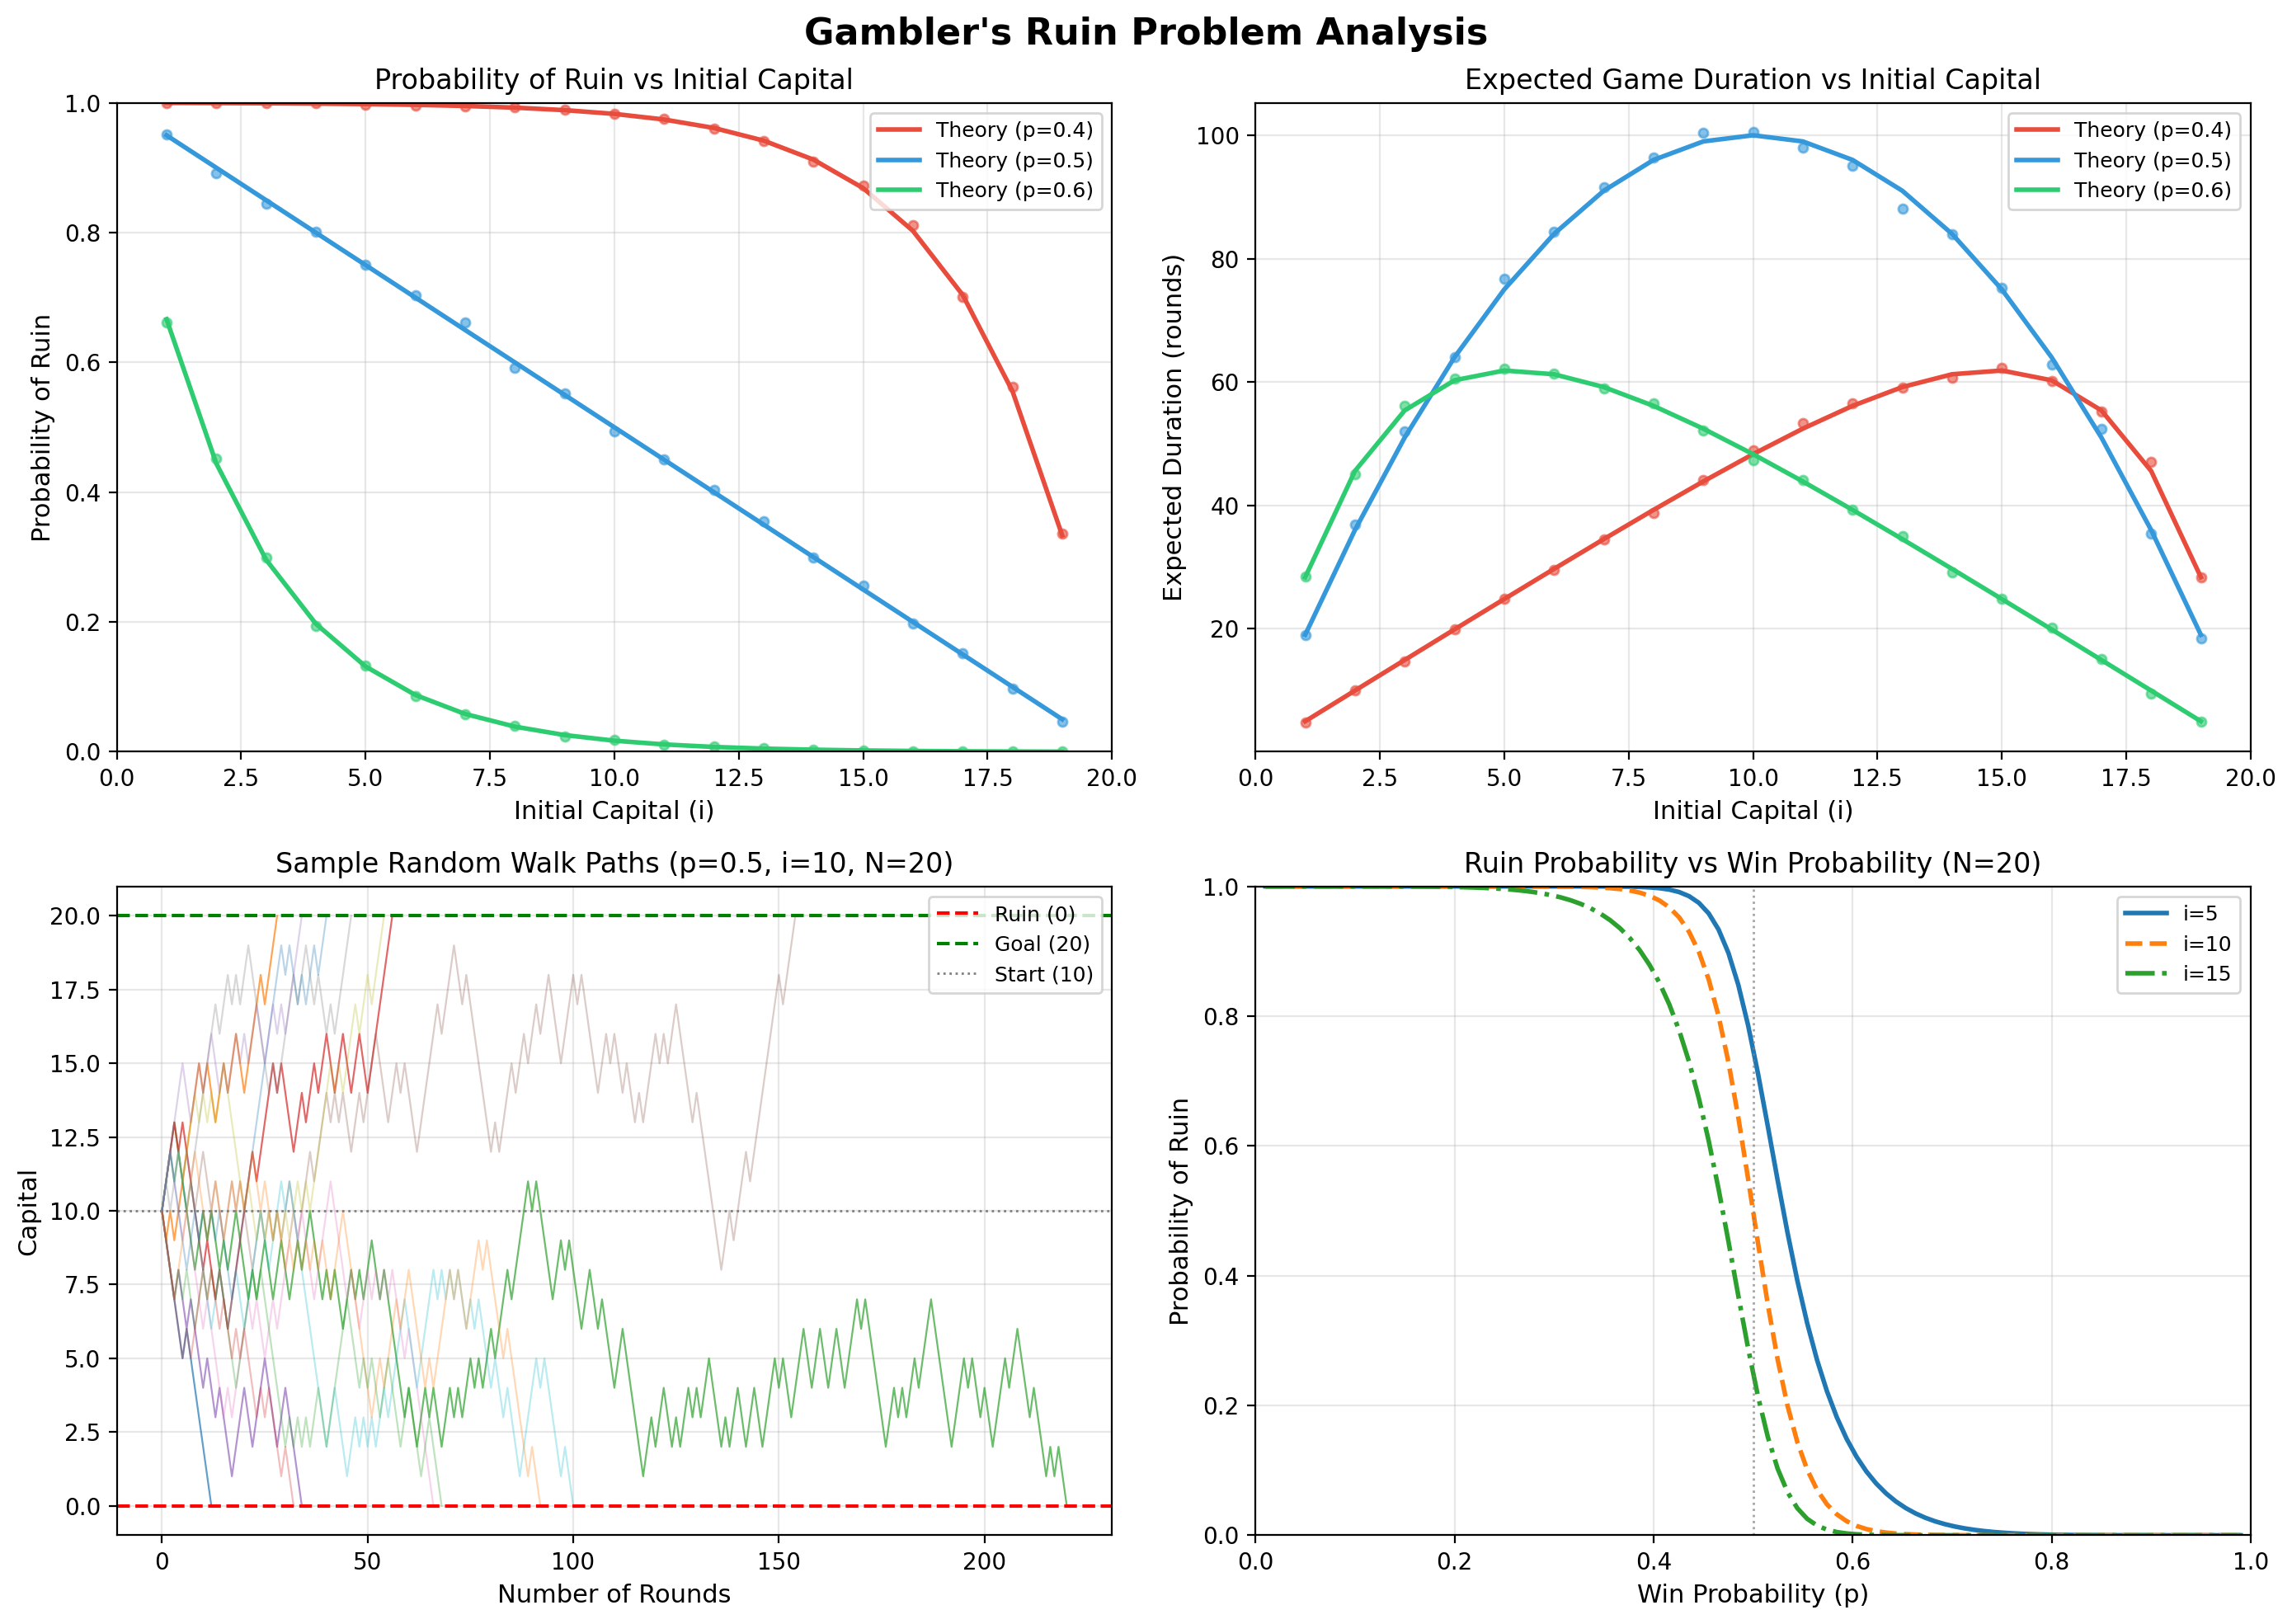


Plot saved to 'plot.png'


In [6]:
# Create figure with multiple subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle("Gambler's Ruin Problem Analysis", fontsize=16, fontweight='bold')

# Color scheme
colors = {'0.4': '#e74c3c', '0.5': '#3498db', '0.6': '#2ecc71'}

# Plot 1: Probability of Ruin vs Initial Capital
ax1 = axes[0, 0]
for p in p_values:
    color = colors[str(p)]
    ax1.plot(list(initial_capitals), results[p]['analytical_ruin'], 
             '-', color=color, linewidth=2, label=f'Theory (p={p})')
    ax1.plot(list(initial_capitals), results[p]['simulated_ruin'], 
             'o', color=color, markersize=4, alpha=0.6)

ax1.set_xlabel('Initial Capital (i)', fontsize=11)
ax1.set_ylabel('Probability of Ruin', fontsize=11)
ax1.set_title('Probability of Ruin vs Initial Capital', fontsize=12)
ax1.legend(loc='upper right', fontsize=9)
ax1.grid(True, alpha=0.3)
ax1.set_xlim(0, N)
ax1.set_ylim(0, 1)

# Plot 2: Expected Duration vs Initial Capital
ax2 = axes[0, 1]
for p in p_values:
    color = colors[str(p)]
    ax2.plot(list(initial_capitals), results[p]['analytical_duration'], 
             '-', color=color, linewidth=2, label=f'Theory (p={p})')
    ax2.plot(list(initial_capitals), results[p]['simulated_duration'], 
             'o', color=color, markersize=4, alpha=0.6)

ax2.set_xlabel('Initial Capital (i)', fontsize=11)
ax2.set_ylabel('Expected Duration (rounds)', fontsize=11)
ax2.set_title('Expected Game Duration vs Initial Capital', fontsize=12)
ax2.legend(loc='upper right', fontsize=9)
ax2.grid(True, alpha=0.3)
ax2.set_xlim(0, N)

# Plot 3: Sample Random Walk Paths
ax3 = axes[1, 0]
for idx, path in enumerate(sample_paths[:15]):
    alpha = 0.7 if idx < 5 else 0.3
    ax3.plot(path, alpha=alpha, linewidth=0.8)

ax3.axhline(y=0, color='red', linestyle='--', linewidth=1.5, label='Ruin (0)')
ax3.axhline(y=N_total, color='green', linestyle='--', linewidth=1.5, label=f'Goal ({N_total})')
ax3.axhline(y=i_start, color='gray', linestyle=':', linewidth=1, label=f'Start ({i_start})')

ax3.set_xlabel('Number of Rounds', fontsize=11)
ax3.set_ylabel('Capital', fontsize=11)
ax3.set_title(f'Sample Random Walk Paths (p={p_fair}, i={i_start}, N={N_total})', fontsize=12)
ax3.legend(loc='upper right', fontsize=9)
ax3.grid(True, alpha=0.3)
ax3.set_ylim(-1, N_total + 1)

# Plot 4: Ruin Probability as Function of p
ax4 = axes[1, 1]
p_range = np.linspace(0.01, 0.99, 100)
initial_vals = [5, 10, 15]
line_styles = ['-', '--', '-.']

for i_val, ls in zip(initial_vals, line_styles):
    ruin_probs = [probability_of_ruin(i_val, N, p) for p in p_range]
    ax4.plot(p_range, ruin_probs, ls, linewidth=2, label=f'i={i_val}')

ax4.axvline(x=0.5, color='gray', linestyle=':', linewidth=1, alpha=0.7)
ax4.set_xlabel('Win Probability (p)', fontsize=11)
ax4.set_ylabel('Probability of Ruin', fontsize=11)
ax4.set_title(f'Ruin Probability vs Win Probability (N={N})', fontsize=12)
ax4.legend(loc='upper right', fontsize=9)
ax4.grid(True, alpha=0.3)
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)

plt.tight_layout()
plt.savefig('gamblers_ruin_problem_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Results Analysis

### Key Findings

Let's examine some numerical results to verify our simulations match theory.

In [7]:
# Display comparison table for specific cases
print("="*70)
print("COMPARISON: ANALYTICAL vs SIMULATED RESULTS")
print("="*70)
print(f"Total Capital N = {N}")
print()

test_cases = [(5, 0.4), (10, 0.5), (15, 0.6)]

for i, p in test_cases:
    idx = i - 1  # Convert to 0-based index
    
    analytical_p_ruin = results[p]['analytical_ruin'][idx]
    simulated_p_ruin = results[p]['simulated_ruin'][idx]
    analytical_dur = results[p]['analytical_duration'][idx]
    simulated_dur = results[p]['simulated_duration'][idx]
    
    print(f"Initial Capital i = {i}, Win Probability p = {p}")
    print(f"  Ruin Probability:  Theory = {analytical_p_ruin:.4f}, Simulation = {simulated_p_ruin:.4f}")
    print(f"  Expected Duration: Theory = {analytical_dur:.2f}, Simulation = {simulated_dur:.2f}")
    print()

COMPARISON: ANALYTICAL vs SIMULATED RESULTS
Total Capital N = 20

Initial Capital i = 5, Win Probability p = 0.4
  Ruin Probability:  Theory = 0.9980, Simulation = 0.9972
  Expected Duration: Theory = 24.80, Simulation = 24.88

Initial Capital i = 10, Win Probability p = 0.5
  Ruin Probability:  Theory = 0.5000, Simulation = 0.4934
  Expected Duration: Theory = 100.00, Simulation = 100.48

Initial Capital i = 15, Win Probability p = 0.6
  Ruin Probability:  Theory = 0.0020, Simulation = 0.0022
  Expected Duration: Theory = 24.80, Simulation = 24.78



## Insights and Conclusions

### Mathematical Insights

1. **Fair Game Paradox**: Even in a fair game ($p = 0.5$), the gambler will eventually be ruined with probability $1 - i/N$. Starting with half the total capital gives a 50% ruin probability.

2. **House Edge Effect**: When $p < 0.5$ (unfavorable odds), the probability of ruin increases dramatically. This explains why casinos maintain a house edge.

3. **Duration Maximized at Midpoint**: For fair games, the expected duration is maximized when starting at $i = N/2$, giving $D_{N/2} = N^2/4$ rounds.

4. **Exponential Sensitivity**: The ruin probability is exponentially sensitive to the win probability $p$. Small changes in $p$ near 0.5 have large effects.

### Practical Implications

- **Bankroll Management**: A larger initial bankroll relative to the goal reduces ruin probability
- **Edge Matters**: Even a small edge ($p > 0.5$) dramatically improves long-term outcomes
- **Time Risk**: Longer games (larger $N$) increase variance and ruin risk in unfavorable situations